In [1]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar

In [2]:
# %% list of data to read in
def data_dict(myid):
    if myid == 'hfls':
        mydict = {
            'indir': '/work/bb1153/b381639/model/data_icon',
            'infile': '/work/bb1153/b381639/model/data_icon/heatflux_tropics_atm_2d_ml_ocean_rm35run.nc',
            'key': iris.Constraint(cube_func=(lambda c: c.var_name == 'hfls'))
        }

    elif myid == 'hfss':
        mydict = {
            'indir': '/work/bb1153/b381639/model/data_icon',
            'infile': '/work/bb1153/b381639/model/data_icon/heatflux_tropics_atm_2d_ml_ocean_rm35run.nc',
            'key': iris.Constraint(cube_func=(lambda c: c.var_name == 'hfss'))
        }
    return(mydict)

In [4]:
## create correct time cubelist to save output data
cubelist_ct = iris.cube.CubeList()
##readin sfcwind
datasets=['hfls','hfss']  #['ERAI']  # ['u-bt405','u-bt406','u-bm213','u-be034','u-bd818']
for my_dataset in datasets:
    print('--> '+my_dataset)
    mydict = data_dict(my_dataset)
    datain = iris.load_cube(mydict['infile'],mydict['key'])
#    data_time= fx.correct_time(datain)

    cubelist_ct.append(datain)

--> hfls
--> hfss


/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)
/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)
/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)
/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)
/sw/spac

In [5]:
cubelist_ct

[<iris 'Cube' of latent heat flux / (W m-2) (time: 213; latitude: 161; longitude: 1440)>,
<iris 'Cube' of sensible heat flux / (W m-2) (time: 213; latitude: 161; longitude: 1440)>]

In [6]:
left = -180
right = 180
bottom = -20
top = 20
y=fx.selregion(cubelist_ct[0],bottom,top,left,right)
x=fx.selregion(cubelist_ct[1],bottom,top,left,right)
x=x[:,:,:]
y=y[:,:,:]

<iris 'Cube' of latent heat flux / (W m-2) (time: 213; latitude: 161; longitude: 1440)>

In [12]:
# %% list of data to read in
def data_dict(myid):
    if myid == 'sst':
        mydict = {
            'indir': '/work/bb1153/b381639/model/data_icon',
            'infile': '/work/bb1153/b381639/model/data_icon/sst_tropics_atm_2d_ml_ocean_rm20run.nc',
            'key': iris.Constraint(cube_func=(lambda c: c.var_name == 'ts'))
        }
    if myid == 'sfcwind':
        mydict = {
            'indir': '/work/bb1153/b381639/model/data_icon',
            'infile': '/work/bb1153/b381639/model/data_icon/sfcwind_2d_ml_ocean_rm20run.nc',
            'key': iris.Constraint(cube_func=(lambda c: c.var_name == 'sfcwind'))
        }
    elif myid == 'hfls':
        mydict = {
            'indir': '/work/bb1153/b381639/model/data_icon',
            'infile': '/work/bb1153/b381639/model/data_icon/heatflux_tropics_atm_2d_ml_ocean_rm20run.nc',
            'key': iris.Constraint(cube_func=(lambda c: c.var_name == 'hfls'))
        }
    elif myid == 'hfss':
        mydict = {
            'indir': '/work/bb1153/b381639/model/data_icon',
            'infile': '/work/bb1153/b381639/model/data_icon/heatflux_tropics_atm_2d_ml_ocean_rm20run.nc',
            'key': iris.Constraint(cube_func=(lambda c: c.var_name == 'hfss'))
        }       
    return(mydict)



In [13]:
## create correct time cubelist to save output data
cubelist_ct = iris.cube.CubeList()

##readin sfcwind
datasets=['sst','sfcwind']  #['ERAI']  # ['u-bt405','u-bt406','u-bm213','u-be034','u-bd818']
for my_dataset in datasets:
    print('--> '+my_dataset)
    mydict = data_dict(my_dataset)
    datain = iris.load_cube(mydict['infile'],mydict['key'])
    data_time= fx.correct_time(datain)
    
    cubelist_ct.append(data_time)
    

--> sst
--> sfcwind


/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)
/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2190: UserWarning: Ignoring netCDF variable 'time' invalid units 'day as %Y%m%d.%f'
  warnings.warn(msg)


In [14]:
cubelist_ct

[<iris 'Cube' of surface_temperature / (K) (time: 228; latitude: 161; longitude: 1440)>,
<iris 'Cube' of 10m windspeed / (m s-1) (time: 228; height: 1; latitude: 161; longitude: 1440)>]

In [16]:
#############################
##select region covers EURE4A
#############################
left = -180
right = 180
bottom = -20
top = 20
y=fx.selregion(cubelist_ct[0],bottom,top,left,right)
x=fx.selregion(cubelist_ct[1],bottom,top,left,right)
x=x[:,0,::4,::4]
y=y[:,::4,::4]

regyonx=fx.regress_yonx(x,y)
iris.save(regyonx,mydict['indir']+'/regress_sst_sfcwind.nc')

/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/sw/spack-rhel6/miniforge3-4.9.2-3-Linux-x86_64-pwdbqi/lib/python3.8/site-packages/scipy/stats/_stats_msta

In [17]:
regyonx


<iris 'Cube' of hfls_wind_point to point_regressions / (unknown) (Lag time: 1; latitude: 41; longitude: 360)>

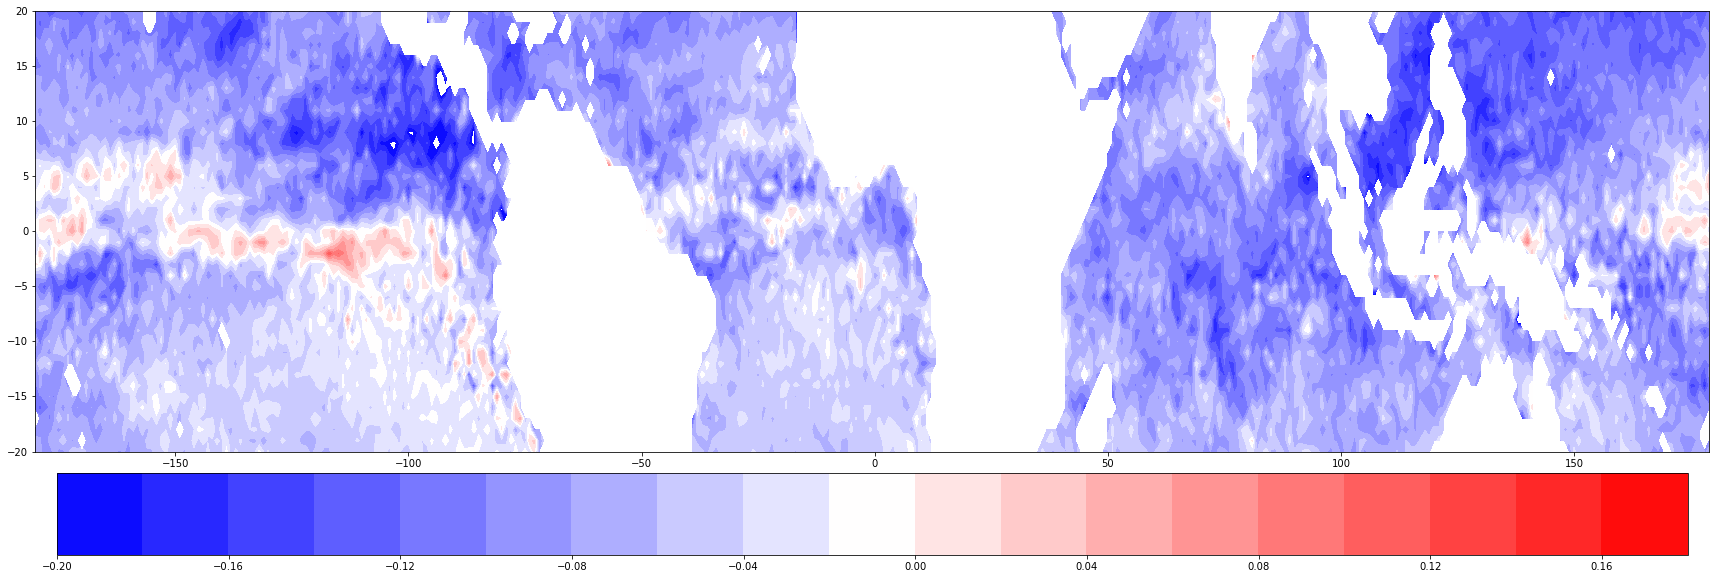

In [21]:
######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(regyonx) # iris cube to xarray
latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data             # lonm is y-axis  

##################
#(2)set color bar and prepare fig size
#levels1=np.arange(-40,0,2) # min and max of the field; dont use it if not sure
#cbar='winter'
levels1=np.arange(-0.2,0.2,0.02) # min and max of the field; dont use it if not sure
cbar='bwr'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,latm,arr[0,:,:],levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arr[0,:,:],cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')
plt.colorbar(orientation='horizontal', pad=0.04)

#####save figure
plt.savefig('regress_SST_on_wind.png',dpi=200)
